<a href="https://colab.research.google.com/github/AlfarRafeek/DSPL-cw1/blob/main/Preprocessing_and_EDU_DSPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!git clone https://github.com/AlfarRafeek/DSPL-cw1

Cloning into 'DSPL-cw1'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 2.69 MiB | 7.43 MiB/s, done.


#Step:1 - Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Justification:
* pandas (pd): Used for data manipulation and analysis, primarily for handling structured data in DataFrames.
* numpy (np): Provides numerical operations and array handling for efficient computation.
* seaborn (sns): Used for statistical data visualization.
* matplotlib.pyplot (plt): Used for creating static, animated, and interactive visualizations.



#Step:2 - Read the dataset

In [ ]:
Data_path = "/content/traincsv.csv"
df = pd.read_csv(Data_path,low_memory=False)

In [ ]:
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756,5292,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


Justification:
* Defines the file path for the dataset (traincsv.csv).
* Uses pd.read_csv() to load the dataset into a pandas DataFrame (df).
* The low_memory=False parameter prevents pandas from guessing column data types, ensuring accuracy in large datasets.
* df.head(): Displays the first five rows of the dataset.

#Step:3 - Sanity check of data

In [ ]:
df.shape

(774155, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


Justification:
* df.shape: Shows the dataset’s dimensions (rows, columns).
* df.info(): Provides an overview of column names, data types, and missing values.


In [ ]:
#Checking the missing and duplicates values
missing_values = df.isnull().sum()
duplicate_count = df.duplicated().sum()

In [ ]:
missing_values

,0
Customer_ID,2
outlet_city,2
luxury_sales,35
fresh_sales,41
dry_sales,30
cluster_catgeory,1


In [ ]:
duplicate_count

0

Justification:
* df.isnull().sum(): Counts missing values per column.
* df.duplicated().sum(): Counts duplicate rows.


#Step4: - Convert Non-Numeric Values in Sales Columns to Numeric

In [ ]:
#Convert Non-Numeric Values in Sales Columns to Numeric
num_cols = ['luxury_sales', 'fresh_sales', 'dry_sales','cluster_catgeory']

def convert_to_numeric(column):
    df[column] = pd.to_numeric(df[column], errors='coerce')


# Apply conversion
for col in num_cols:
    convert_to_numeric(col)

Justification:
* Converts specific columns to numeric data types.
* pd.to_numeric(errors='coerce') replaces non-numeric values with NaN


In [ ]:
#Identifiying garbage value
for i in df.select_dtypes(include=['object']).columns:
  print(i,df[i].value_counts())
  print("***"*10)

outlet_city outlet_city
Colombo                   41031
Batticaloa                41012
Galle                     41010
Kalmunai                  40711
Negombo                   40703
Jaffna                    40675
Katunayake                40649
Kandy                     40534
Trincomalee               40528
Gampaha                   40252
Peliyagoda                37151
Nuwara Eliya              37102
Dehiwala-Mount Lavinia    36839
Kotte                     36788
Panadura                  36726
Wattala                   36721
Kaduwela                  36695
Homagama                  36639
Moratuwa                  36417
Kelaniya                  35970
Name: count, dtype: int64
******************************


Justification:
* Iterates through all categorical columns.
* Prints unique values and their counts.



#Step:5 - Exploratory Data Analsis(EDA)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,774153.0,1.038708e+07,223479.479936,10000000.0,10193538.00,10387077.00,1.058062e+07,10774154.00
luxury_sales,774110.0,1.921965e+03,1004.078513,500.0,1213.53,1715.28,2.338697e+03,6999.65
fresh_sales,774105.0,4.428680e+03,3334.654673,500.0,1620.19,3356.48,6.671610e+03,13997.90
dry_sales,774117.0,4.676280e+03,3409.386733,500.0,1787.94,3727.76,7.162200e+03,13999.30
cluster_catgeory,774153.0,3.292701e+00,1.881905,1.0,2.00,3.00,5.000000e+00,100.00


In [ ]:
df.describe(include = "object")

,outlet_city
count,774153
unique,20
top,Colombo
freq,41031


Justification:
* .describe().T: Shows summary statistics for numerical columns.
* .describe(include="object"): Summarizes categorical data.


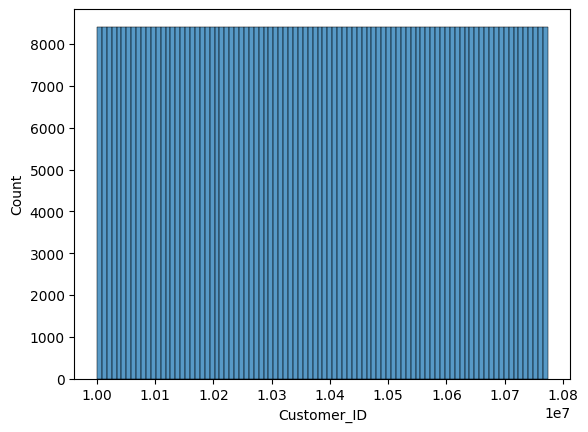

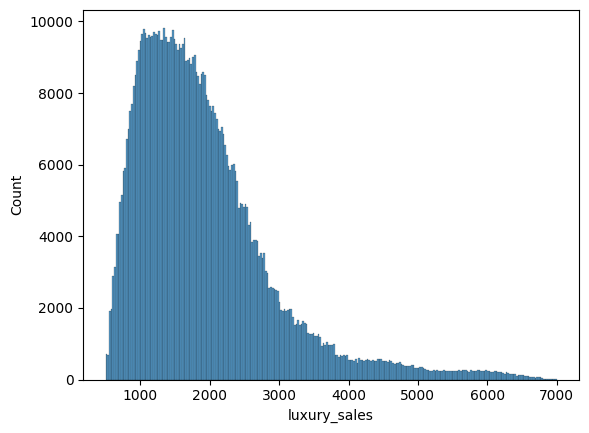

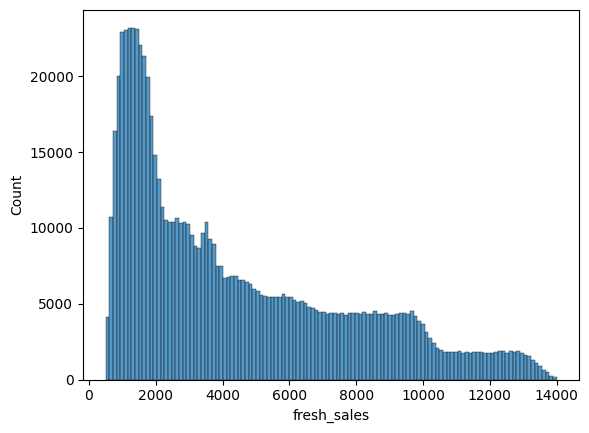

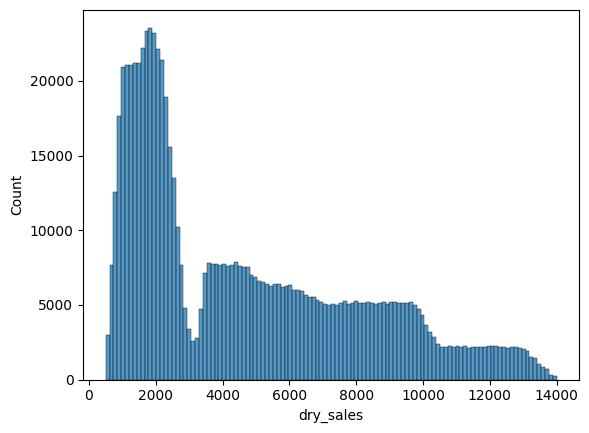

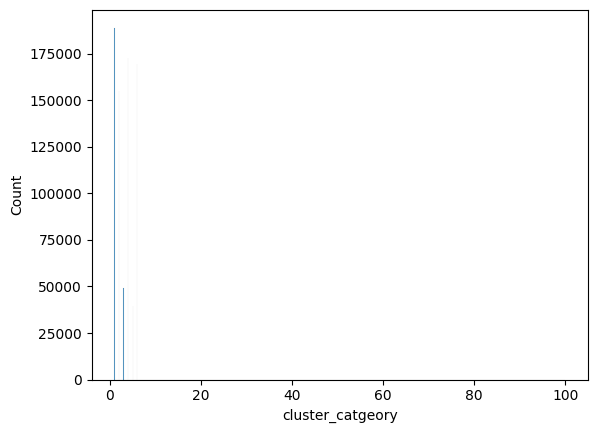

In [ ]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

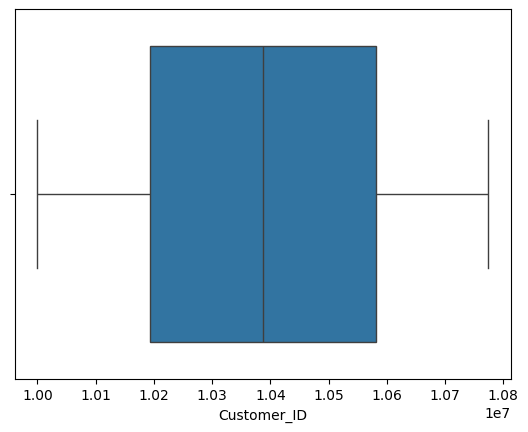

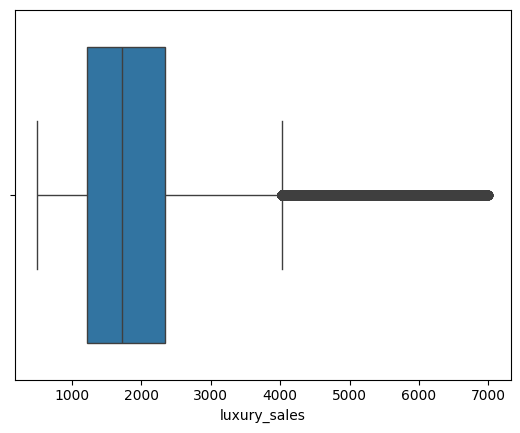

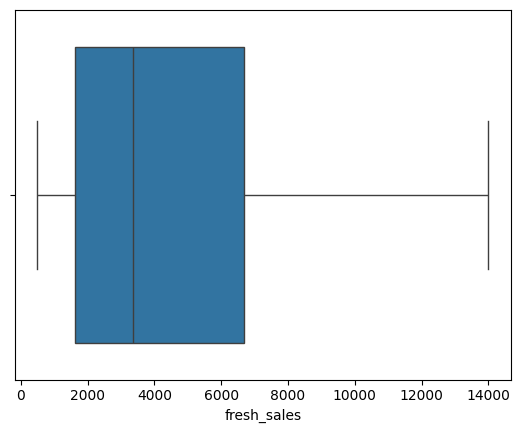

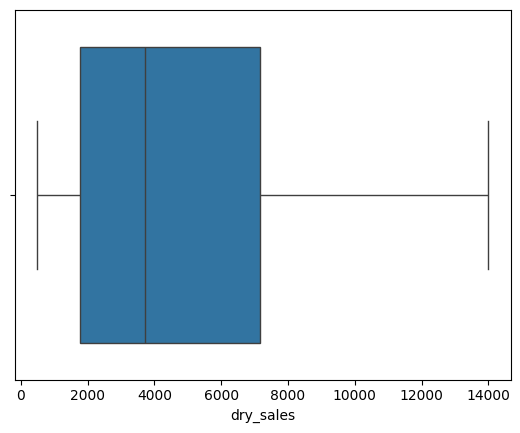

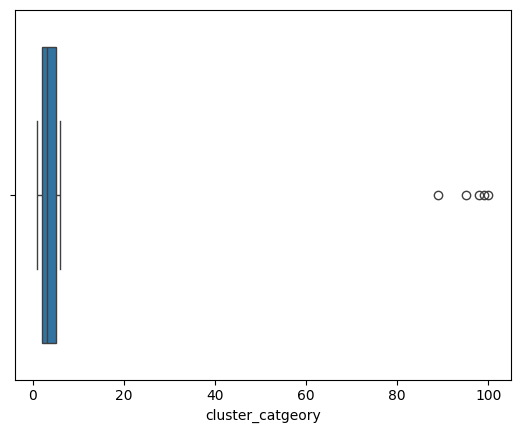

In [ ]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

<Axes: >

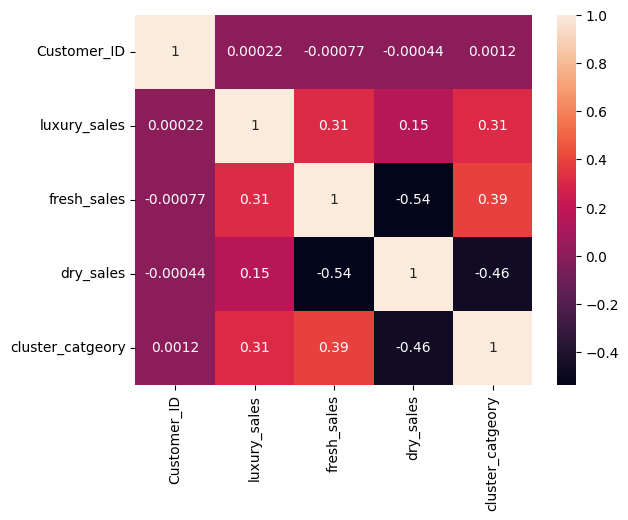

In [ ]:
s = df.select_dtypes(include="number").corr()
sns.heatmap(s,annot=True)

Justification:
* Ignores warnings for cleaner output.
* Plots histograms for each numeric column to visualize distribution.
* Uses sns.boxplot() to visualize the distribution and detect outliers.
* df.corr(): Computes correlations between numerical columns.
* sns.heatmap(): Visualizes relationships using a heatmap.
* annot=True: Displays correlation values on the heatmap.



#Step:6 - Missing value treatments

In [ ]:
df.isnull().sum()

,0
Customer_ID,2
outlet_city,2
luxury_sales,45
fresh_sales,50
dry_sales,38
cluster_catgeory,2


In [ ]:
for i in ['cluster_catgeory','luxury_sales','fresh_sales','dry_sales']:
    df[i].fillna(df[i].median(),inplace=True)

# Handle the outlet_city column separately using mode for categorical data
df['outlet_city'].fillna(df['outlet_city'].mode()[0], inplace=True)

Justification:
* This loop fills missing values in selected numerical columns using their median.
* Why median? The median is less affected by outliers compared to the mean, making it a robust choice for filling missing numerical data.
* The mode (most frequently occurring value) is used for categorical variables.
* Why mode? Since categorical data doesn't have numerical properties, replacing missing values with the most common value preserves data consistency.


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()


Justification:
* KNNImputer fills missing values by finding the k-nearest neighbors (default k=5) and averaging their values.
* This method is useful for numerical data where values are similar based on certain patterns.


In [ ]:
for i in df.select_dtypes(include="number").columns:
  df[i] = imputer.fit_transform(df[[i]])

Justification:
* Iterates over all numerical columns and applies KNN imputation.
* Ensures missing values are replaced with contextually relevant values derived from similar data points.


In [ ]:
df.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_catgeory,0


Justification:
* Re-checks if all missing values have been handled.
* Ensures the dataset is clean before further analysis.


#Step7:- Outliers treatments

In [ ]:
def wisker (col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  lower_bound = q1 - (1.5*iqr)
  upper_bound = q3 + (1.5*iqr)
  return lower_bound,upper_bound

Justification:
* Calculates Q1 (25th percentile) and Q3 (75th percentile) to determine the middle 50% of the data.
* Computes IQR (Interquartile Range) as iqr = q3 - q1, which represents data spread.
* Defines lower and upper bounds for outliers:
    * Lower Bound = Q1 - (1.5 * IQR): Values below this are considered outliers.
    * Upper Bound = Q3 + (1.5 * IQR): Values above this are considered outliers.
* Returns these bounds for further analysis.


In [ ]:
for column in df.select_dtypes(include="number").columns:
    lower_bound, upper_bound = wisker(df[column])
    print(f"Column: {column}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Column: Customer_ID, Lower Bound: 9612924.5, Upper Bound: 11161228.5
Column: luxury_sales, Lower Bound: -474.0750000000003, Upper Bound: 4026.2850000000003
Column: fresh_sales, Lower Bound: -5956.369999999999, Upper Bound: 14247.869999999999
Column: dry_sales, Lower Bound: -6272.64, Upper Bound: 15222.400000000001
Column: cluster_catgeory, Lower Bound: -2.5, Upper Bound: 9.5


Justification:
* Iterates through all numerical columns in the dataset.
* Calls the wisker() function to calculate outlier boundaries for each column.
* Prints the calculated lower and upper bounds for reference.


Column: Customer_ID, Lower Bound: 9612924.5, Upper Bound: 11161228.5


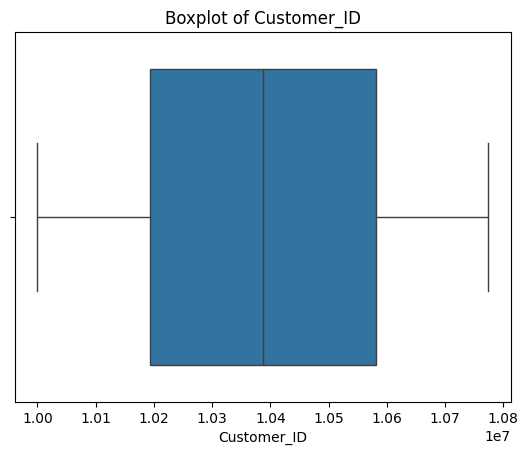

Column: luxury_sales, Lower Bound: -474.0750000000003, Upper Bound: 4026.2850000000003


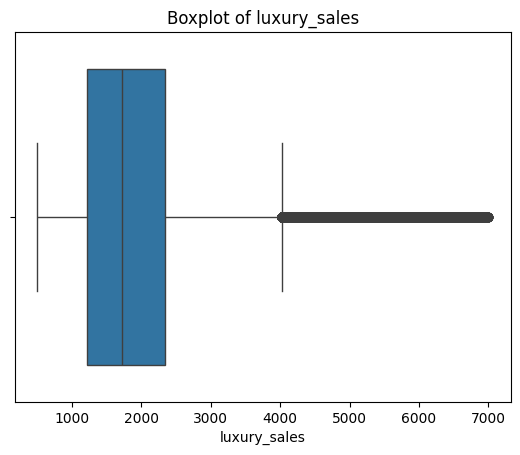

Column: fresh_sales, Lower Bound: -5956.369999999999, Upper Bound: 14247.869999999999


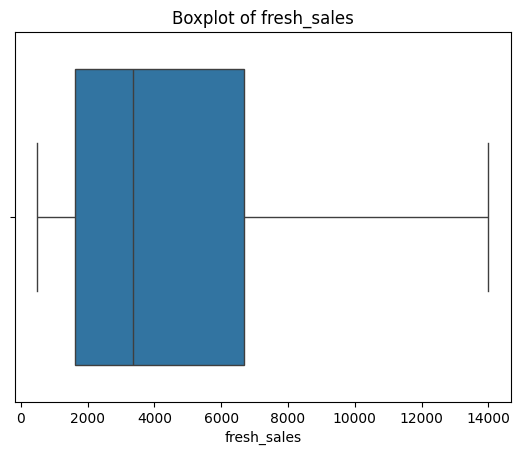

Column: dry_sales, Lower Bound: -6272.64, Upper Bound: 15222.400000000001


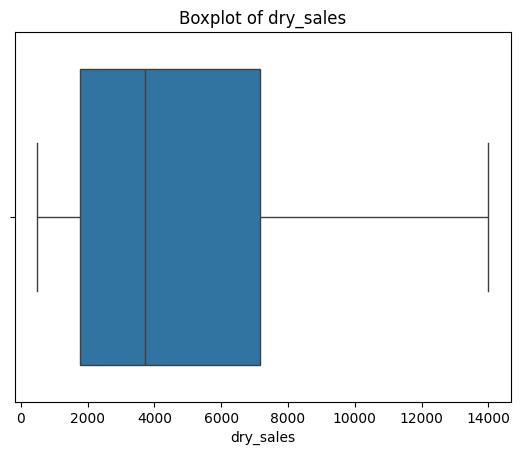

Column: cluster_catgeory, Lower Bound: -2.5, Upper Bound: 9.5


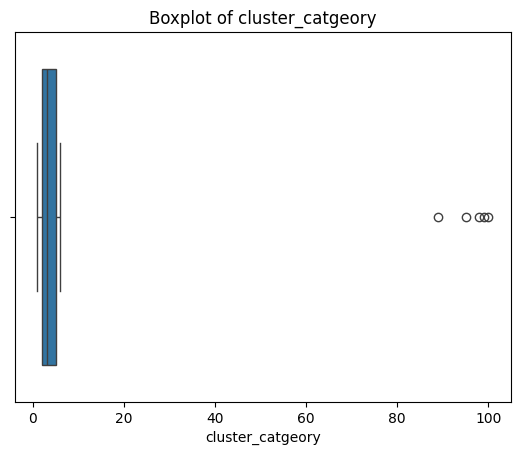

In [ ]:
for column in df.select_dtypes(include="number").columns:
    lower_bound, upper_bound = wisker(df[column])
    print(f"Column: {column}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Create a boxplot for the current column, indentation corrected
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

Justification:
* Iterates through each numerical column again.
* Prints the lower and upper bounds to compare with the boxplot.
* Uses Seaborn's sns.boxplot() to visualize data distribution:
    * The box represents Q1, median, and Q3.
    * The whiskers extend to non-outlier min/max values.
    * Points beyond whiskers are potential outliers.
* plt.title() provides a title for better readability.


#Step:8- Duplicates and Garbage value treatments

In [ ]:
df.drop_duplicates()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4.0
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1.0
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4.0
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4.0
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4.0
...,...,...,...,...,...,...
774150,10197979.0,Gampaha,3893.40,3893.40,3448.44,3.0
774151,10494575.0,Katunayake,6095.86,5557.99,6275.15,3.0
774152,10565682.0,Colombo,5121.42,4820.16,4669.53,3.0
774153,10351977.0,Kandy,6311.76,6311.76,5940.48,3.0


Justification:
* df.drop_duplicates() removes duplicate rows from the dataset.


#Step:9 - Encoding of data

In [ ]:
pd.get_dummies(df,columns=['outlet_city'],drop_first=True)

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,outlet_city_Colombo,outlet_city_Dehiwala-Mount Lavinia,outlet_city_Galle,outlet_city_Gampaha,outlet_city_Homagama,...,outlet_city_Katunayake,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
0,10493832.0,1209.60,756.00,5292.00,4.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,10178643.0,1590.12,1060.08,6007.12,1.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,10513916.0,2288.88,1481.04,9155.52,4.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,10334589.0,2274.94,1739.66,9099.76,4.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,10458365.0,2345.49,2069.55,9243.99,4.0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774150,10197979.0,3893.40,3893.40,3448.44,3.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
774151,10494575.0,6095.86,5557.99,6275.15,3.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
774152,10565682.0,5121.42,4820.16,4669.53,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
774153,10351977.0,6311.76,6311.76,5940.48,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Justification:
* pd.get_dummies() converts categorical variables into numerical representations using one-hot encoding.
* columns=['outlet_city']: Specifies that the outlet_city column should be encoded.
* drop_first=True: Drops the first category to avoid the dummy variable trap (which can cause multicollinearity in regression models).


Why Use One-Hot Encoding?
* Converts categorical data into a format suitable for machine learning models.
* Prevents models from misinterpreting categories as ordinal data.


#Step:10- Saving the Preprocessed DataFrame as a CSV File

In [ ]:
df.to_csv('preprocessed_train_data.csv', index=False)


#DBSCAN Model

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
Data_path = "/content/preprocessed_train_data.csv"
df = pd.read_csv(Data_path,low_memory=False)

In [ ]:
X = df.select_dtypes(include="number").columns